keywords2similarity2でやってみる

In [14]:
import sqlite3
import pandas as pd
import MeCab
import ipadic
import re
import sys
sys.path.append("../chat")
import openai
import os
import seaborn as sns

In [2]:
import chat
from chat.db import query
from chat.entry_points.load_keywords import condition
from chat.chunk import morphological_analysis
from chat.prompt import question2keywords, keywords2simirality2, load_content

In [3]:
question = "ふくおかフィナンシャルグループと横浜銀行は、どういう関係がありますか"
kws = question2keywords(question)
sims = keywords2simirality2(kws)

query: reading cache


In [5]:
contents = load_content(sims["chunk_id"][:5])
contents

query: reading cache


['２当社は平成19年４月２日付で東京証券取引所市場第一部に上場いたしました。従って、それ以前の株価については該当ありません。(2)【最近６月間の月別最高・最低株価】(注)最高・最低株価は、東京証券取引所市場第一部における株価を記載しております。４【株価の推移】回次第１期第２期第３期第４期決算年月平成20年３月平成21年３月平成22年３月平成23年３月最高(円)982576441437最低(円)471248284261月別平成22年10月11月12月平成23年１月２月３月最高(円)345346369374385379最低(円)300304320346340261―46―５【役員の状況】役名職名氏名生年月日略歴任期所有株式数(千株)取締役会長兼社長(代表取締役)谷正明昭和18年１月23日生昭和41年４月福岡銀行入行平成23年６月から１年普通株式40平成４年１月同総合企画部長平成５年６月同取締役総合企画部長平成７年６月同常務取締役平成11年６月同専務取締役(代表取締役)平成12年４月同取締役副頭取(代表取締役)平成17年４月同取締役頭取(代表取締役)平成18年６月同取締役頭取(代表取締役)(執行役員兼務)(現職)平成19年４月ふくおかフィナンシャルグループ取締役会長兼社長(代表取締役)平成21年４月同取締役会長兼社長(代表取締役)(執行役員兼務)(現職）取締役小幡修昭和23年10月21日生昭和47年４月福岡銀行入行平成23年６月から１年普通株式54平成14年４月同営業統括部長平成14年６月同取締役営業統括部長兼国際部長平成14年10月同取締役営業統括部長平成15年４月同取締役本店営業部長平成17年４月同常務取締役福岡地区本部長平成18年４月同常務取締役平成18年６月同取締役常務執行役員平成18年11月同取締役専務執行役員平成19年４月ふくおかフィナンシャルグループ取締役平成21年４月同取締役執行役員（現職）平成22年４月福岡銀行取締役副頭取(代表取締役)(執行役員兼務)(現職)取締役柴戸隆成昭和29年３月13日生昭和51年４月福岡銀行入行平成23年６月から１年普通株式41平成13年６月同総合企画部長平成15年６月同取締役総合企画部長平成17年４月同常務取締役平成18年６月同取締役常務執行役員平成19年４月同取締役専務執行役員平成19年４月ふくおかフィナンシャルグループ取

In [7]:
len(contents[0])

3421

今度は、異様に長いコンテンツが有利になってしまっている。そもそも、チャンクの長さが300に収まってないのがおかしい。やっぱりチャンクの最大長を厳密に守る作り方をすれば・・とも言える。チャンクを作り直すのは時間がかかるので、今はやらない。

tcidfを計算するときに、チャンクの長さを300で区切ってしまう。そのチャンクに対して、tcidfを計算してみる。

これをやり直そうとすると、keywordsから作り直す必要がある・・かと思ったけど→keywordsから先頭N単語を抜いたテーブルを作成すれば、大体、やりたいことになってるはず。とすると、tcidfテーブルを作るときに一時テーブルを作れば良いので大丈夫そう。

大体、一個のチャンクにkeywordが何個入っているかというと・・

In [11]:
df = query("""
select
  chunk_id,
  count(1) as cnt
from
  keywords
group by
  chunk_id
""")

query: reading cache


(0.0, 100.0)

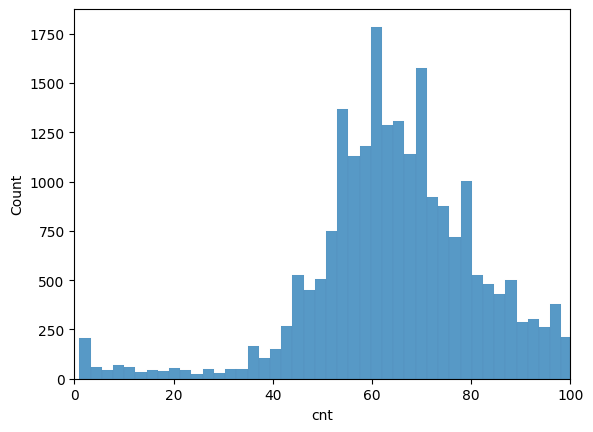

In [16]:
ax = sns.histplot(
    x="cnt",
    data=df
)
ax.set_xlim(0, 100)

80個くらいで良いかな